<a href="https://colab.research.google.com/github/hakonem/DAPE1400-Oblig2/blob/master/DAVE3625_Oblig2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case 1: Predict stock market price for TESLA.

Make a prediction algorithm which predicts the price of this stock on a specific date. Input will be date and output should be price of that stock (close value in the data file). Also show the prediction percentage score.

In [129]:
# Imports

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [130]:
# Upload latest dataset
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


In [159]:
# Read csv file into new dataframe, parsing Date as a date type. Show first 5 rows:
df = pd.read_csv('TSLA.csv', sep=',', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
1,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
2,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
3,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
4,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300


In [160]:
# Create time series by setting index to the Date column

df = df.set_index('Date')

In [144]:
# From https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series:
# "By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use."

# Set period to D (calendar day frequency):
df = df.to_period('D')

In [161]:
# Examine data types

df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [162]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300


This is a time series forecasting problem, where we want to predict future values of our target feature ('Close') on a given date. 'Close' is a continuous numeric data type. Regression algorithms are used to predict continuous values, so a regression algorithm would therefore be most appropriate for this problem.

In [174]:
# From https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series:
# We need to convert x-axis values (Date) to numbers before we can feed them into our regression model.
# To do this we create a time dummy by counting length of series and saving the values in a new column, 'Time'.

df['Time'] = np.arange(len(df.index))

df.head()

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,0
2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,1
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,2
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,3
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,4


In [178]:
# Training data
X = df.loc[:, ['Time']]
y = df.loc[:, 'Close']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

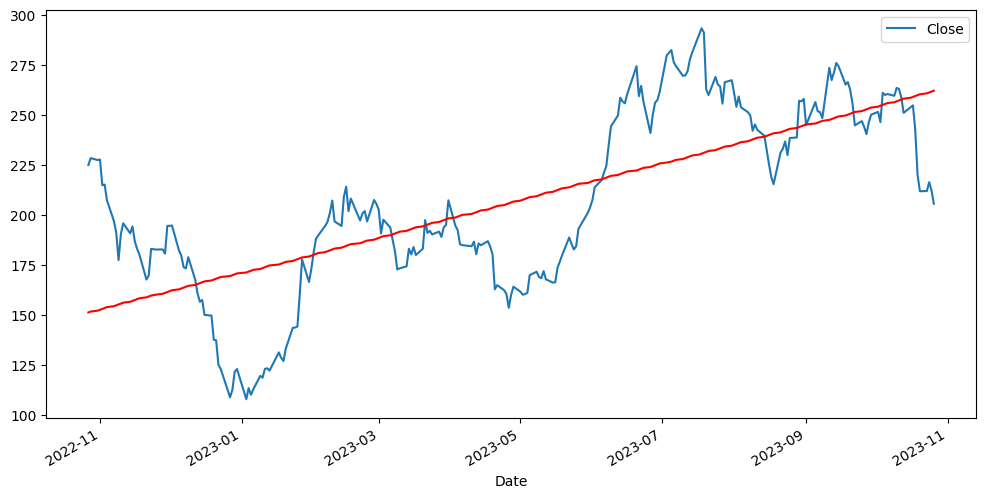

In [179]:
df.plot(y='Close', figsize=(12,6))
plt.plot(y_pred, color='red')

In [180]:
# Split data set into training and testing sets

X = pd.DataFrame(df['Time'])
y = pd.DataFrame(df['Close'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
y_pred = linear_regressor.predict(X_train)  # make predictions

In [182]:
# https://towardsdatascience.com/time-series-forecast-error-metrics-you-should-know-cc88b8c67f27
# recommends MAPE as metric for evaluating accuracy of time series model

print( "Training set: MAPE (Mean Absolute Percentage Error) = "+str(metrics.mean_absolute_percentage_error(y_train,y_pred)))
print( "Training set: MAE (Mean Absolute Error) = "+str(metrics.mean_absolute_error(y_train,y_pred)))

Training set: MAPE (Mean Absolute Percentage Error) = 0.14555775922244685
Training set: MAE (Mean Absolute Error) = 26.766521981975718


In [183]:
# Check model on test data:

y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
print( "Testing set: MAPE (Mean Absolute Percentage Error) = "+str(metrics.mean_absolute_percentage_error(y_test,y_pred)))
print( "Testing set: MAE (Mean Absolute Error) = "+str(metrics.mean_absolute_error(y_test,y_pred)))

Testing set: MAPE (Mean Absolute Percentage Error) = 0.115481605158907
Testing set: MAE (Mean Absolute Error) = 22.54501557034962
